# Linear Regression from scratch using Numpy

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#uploading the dataset
data = pd.read_csv("data.csv", header=None)

#header = None specifies that the dataset doesn't have any headers

data



In [ ]:
x = data[0].values
y = data[1].values

#viewing the dataset
plt.figure()
plt.plot(x, y,'ro')
#ro sets the datapoints to red dots
plt.show()

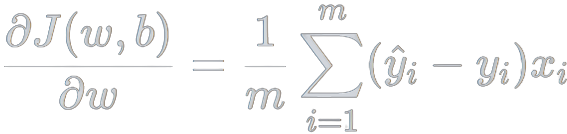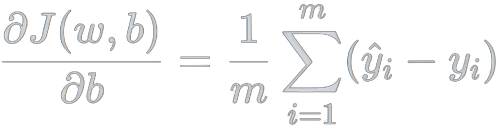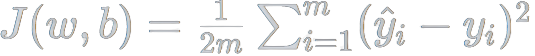

In [ ]:
#Hyperparameters
num_iter = 50
lr = 0.0001
#Initiating variables m and c
m = 0.0
c = 0.0

#list to keep track of changes in cost function, m and c
history_cost = []
m_hist = []
c_hist = []

for i in range(num_iter):
  y_pred = m*x + c

  error = y_pred - y
  cost = 0.5*np.mean(error**2)

  m_deriv = np.mean((y_pred - y)*x)
  c_deriv = np.mean((y_pred - y))

  #Here we are simultaneously updating both m and c

  m = m - lr*m_deriv
  c = c - lr*c_deriv

  history_cost.append(cost)
  m_hist.append(m)
  c_hist.append(c)

print(m)
print(c)

1.4788903781318354
0.030569950649287986


In [ ]:
#plotting the cost function for each iteration
plt.figure()
x_labels = np.arange(0, len(history_cost), 1)
plt.plot(x_labels,history_cost, 'r')
plt.show()

In [ ]:
plt.figure()
plt.plot(x,y,'ro')
x_line = np.linspace(20,80,100)
y_line = m*x_line + c
plt.plot(x_line, y_line)

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

plt.plot(x,y,'ro')
line, = ax.plot([], [], lw=2)
def animate(i):
    x = np.arange(20,90)
    y = m_hist[i] * x + c_hist[i]
    line.set_data(x, y)
    return (line,)

In [ ]:
anim = animation.FuncAnimation(fig, animate,frames=len(m_hist), interval=100)
HTML(anim.to_html5_video())

# Linear Regression Implementation using Sci-Kit

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(data.iloc[:, 0]).reshape((-1, 1))
y = np.array(data.iloc[:, 1])

model = LinearRegression().fit(x, y)

# Print the Intercept:
print('intercept:', model.intercept_)
c = model.intercept_

# Print the Slope:
print('slope:', model.coef_)
m = model.coef_

# Predict a Response and print it:
y_pred = model.predict(x)
plt.figure()
plt.plot(x,y,'ro')
x_line = np.linspace(0,100,100)
y_line = m*x_line + c
plt.plot(x_line, y_line)